# Classification Problem

In [1]:
import pandas as pd
iris_Data=pd.read_csv("Iris.csv")

In [2]:
iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris_Data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
iris_Data.iloc[55:56, 1:6] #(row(start:end-1),col(start:end))

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
55,5.7,2.8,4.5,1.3,Iris-versicolor


In [5]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
iris_Data['Species']=label_encoder.fit_transform(iris_Data['Species'])

In [10]:
iris_Data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
iris_Data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [12]:
iris_Data.shape

(150, 6)

In [17]:
x=iris_Data.iloc[:,1:-1]
y=iris_Data.Species

In [19]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state=0)

In [23]:
xtrain.shape

(112, 4)

In [25]:
ytest.shape

(38,)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from livelossplot import PlotLossesKerasTF

In [28]:
irisModel=Sequential()
#irisModel.add(Input(shape=(4,)))
irisModel.add(Dense(8,input_dim=4,activation='relu'))
irisModel.add(Dense(6,activation='relu'))
irisModel.add(Dense(4,activation='relu'))
irisModel.add(Dense(3,activation='softmax'))

C:\Users\Sreedhar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
irisModel.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [30]:
# We need to convert outcome variable into binary as we are using softmax

from tensorflow.keras.utils import to_categorical

In [31]:
ytrain_encoded=to_categorical(ytrain)
ytest_encoded=to_categorical(ytest)

In [32]:
ytest_encoded

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

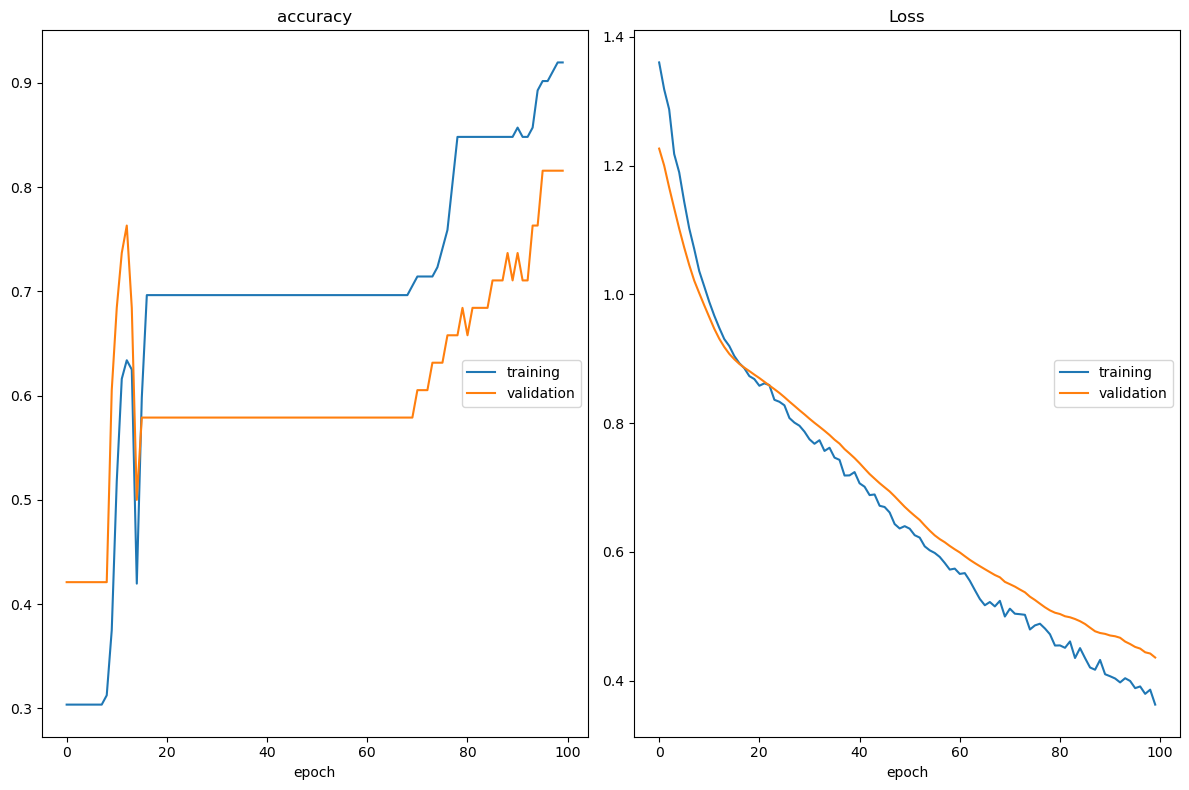

accuracy
	training         	 (min:    0.304, max:    0.920, cur:    0.920)
	validation       	 (min:    0.421, max:    0.816, cur:    0.816)
Loss
	training         	 (min:    0.363, max:    1.360, cur:    0.363)
	validation       	 (min:    0.436, max:    1.226, cur:    0.436)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - accuracy: 0.9272 - loss: 0.3644 - val_accuracy: 0.8158 - val_loss: 0.4359


In [33]:
irisModel.fit(xtrain,ytrain_encoded,epochs=100,validation_data=(xtest,ytest_encoded),callbacks=[PlotLossesKerasTF()])

In [34]:
# Evaluate Method
score=irisModel.evaluate(xtest,ytest_encoded)
print('Test loss:',score[0])
print('Test accuracy:',score[1]*100)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8251 - loss: 0.4322 
Test loss: 0.4359230697154999
Test accuracy: 81.57894611358643


In [35]:
ytrain.value_counts()

Species
2    41
0    37
1    34
Name: count, dtype: int64

# Overfitting: L2 Regularization

In [46]:
from tensorflow.keras.regularizers import l2

In [48]:
irisModel=Sequential()
irisModel.add(Input(shape=(4,)))
irisModel.add(Dense(8,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(6,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(4,activation='relu',kernel_regularizer=l2(l2=0.001)))
irisModel.add(Dense(3,activation='softmax'))
irisModel.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

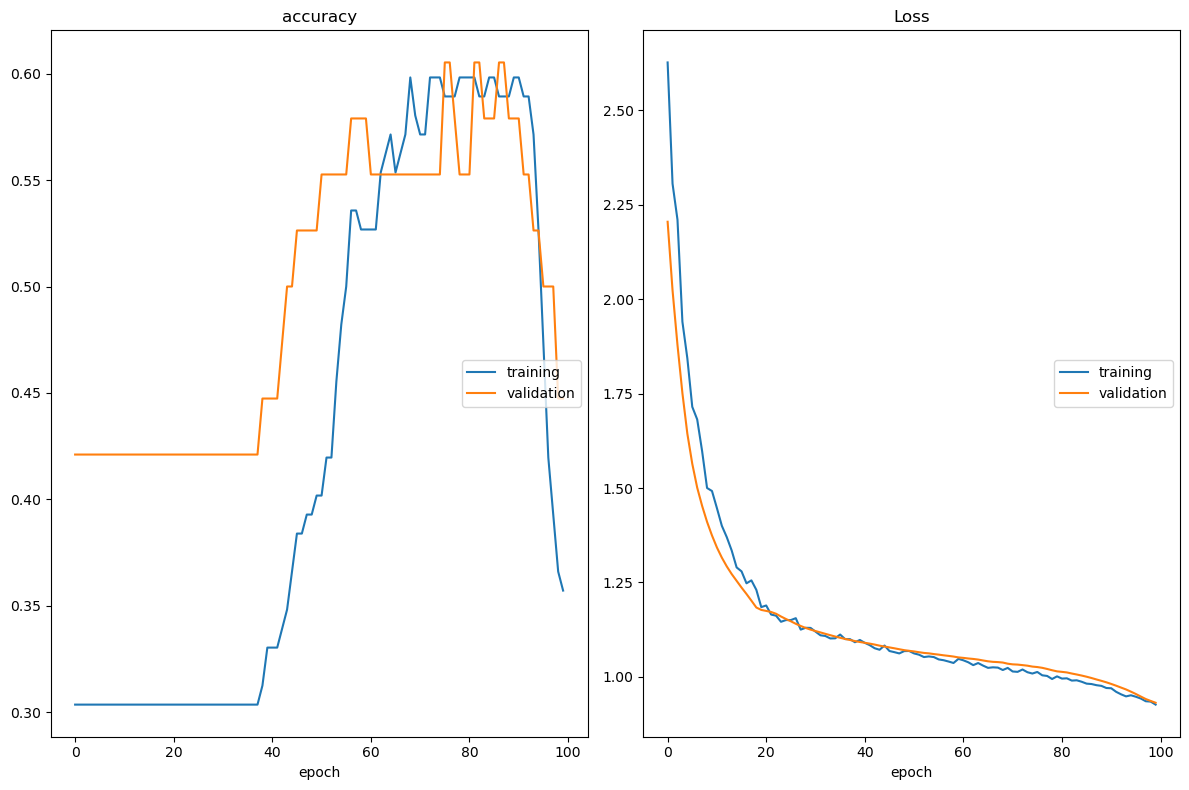

accuracy
	training         	 (min:    0.304, max:    0.598, cur:    0.357)
	validation       	 (min:    0.421, max:    0.605, cur:    0.447)
Loss
	training         	 (min:    0.927, max:    2.627, cur:    0.927)
	validation       	 (min:    0.931, max:    2.205, cur:    0.931)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 213ms/step - accuracy: 0.3762 - loss: 0.9257 - val_accuracy: 0.4474 - val_loss: 0.9315


In [50]:
irisModel.fit(xtrain,ytrain_encoded,epochs=100,validation_data=(xtest,ytest_encoded),callbacks=[PlotLossesKerasTF()])

In [52]:
from sklearn.metrics import classification_report

In [54]:
irisModel.predict(xtest)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[0.23105748, 0.37914926, 0.38979334],
       [0.29008055, 0.4567385 , 0.25318095],
       [0.35123008, 0.46880206, 0.17996785],
       [0.19891326, 0.41688174, 0.38420492],
       [0.37371054, 0.41916695, 0.20712252],
       [0.20499589, 0.40944985, 0.38555425],
       [0.37363893, 0.4193332 , 0.20702788],
       [0.26245794, 0.5059346 , 0.23160739],
       [0.2549463 , 0.48166382, 0.2633899 ],
       [0.28973752, 0.4849689 , 0.2252936 ],
       [0.22042796, 0.3912197 , 0.38835233],
       [0.2728678 , 0.5142376 , 0.2128946 ],
       [0.26770288, 0.474025  , 0.25827214],
       [0.25831428, 0.4651892 , 0.27649656],
       [0.26120928, 0.46366385, 0.2751269 ],
       [0.37738287, 0.41055793, 0.21205926],
       [0.26467875, 0.45712194, 0.27819937],
       [0.27369314, 0.43837067, 0.28793618],
       [0.3787592 , 0.40728754, 0.21395327],
       [0.3608641 , 0.44810796, 0.19102798],
       [0.23137008, 0.37879992, 0.38983   ],
       [0.2700185 , 0.47329587, 0.25668564],
       [0.

In [56]:
irisModel.predict(xtest).argmax(axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step


array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [58]:
# Demonstration of argmax
import numpy as np

In [60]:
a=np.array([[120,45,890],[1,5,2],[100,20,23]])

In [62]:
a

array([[120,  45, 890],
       [  1,   5,   2],
       [100,  20,  23]])

In [64]:
a.argmax(axis=1)

array([2, 1, 0], dtype=int64)

In [66]:
train_pred=irisModel.predict(xtrain).argmax(axis=1)
test_pred=irisModel.predict(xtest).argmax(axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [68]:
print(classification_report(ytrain,train_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.32      0.97      0.48        34
           2       0.88      0.17      0.29        41

    accuracy                           0.36       112
   macro avg       0.40      0.38      0.25       112
weighted avg       0.42      0.36      0.25       112



C:\Users\Sreedhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sreedhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sreedhar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print(classification_report(ytest,test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.43      0.94      0.59        16
           2       0.67      0.22      0.33         9

    accuracy                           0.45        38
   macro avg       0.37      0.39      0.31        38
weighted avg       0.34      0.45      0.33        38



In [72]:
ytrain.value_counts()

Species
2    41
0    37
1    34
Name: count, dtype: int64

In [74]:
ytest.value_counts()

Species
1    16
0    13
2     9
Name: count, dtype: int64

# L1 Regularization

In [76]:
from tensorflow.keras.regularizers import l1

In [78]:
irisModel1=Sequential()
irisModel1.add(Input(shape=(4,)))
irisModel1.add(Dense(8,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(6,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(4,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel1.add(Dense(3,activation='softmax'))
irisModel1.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

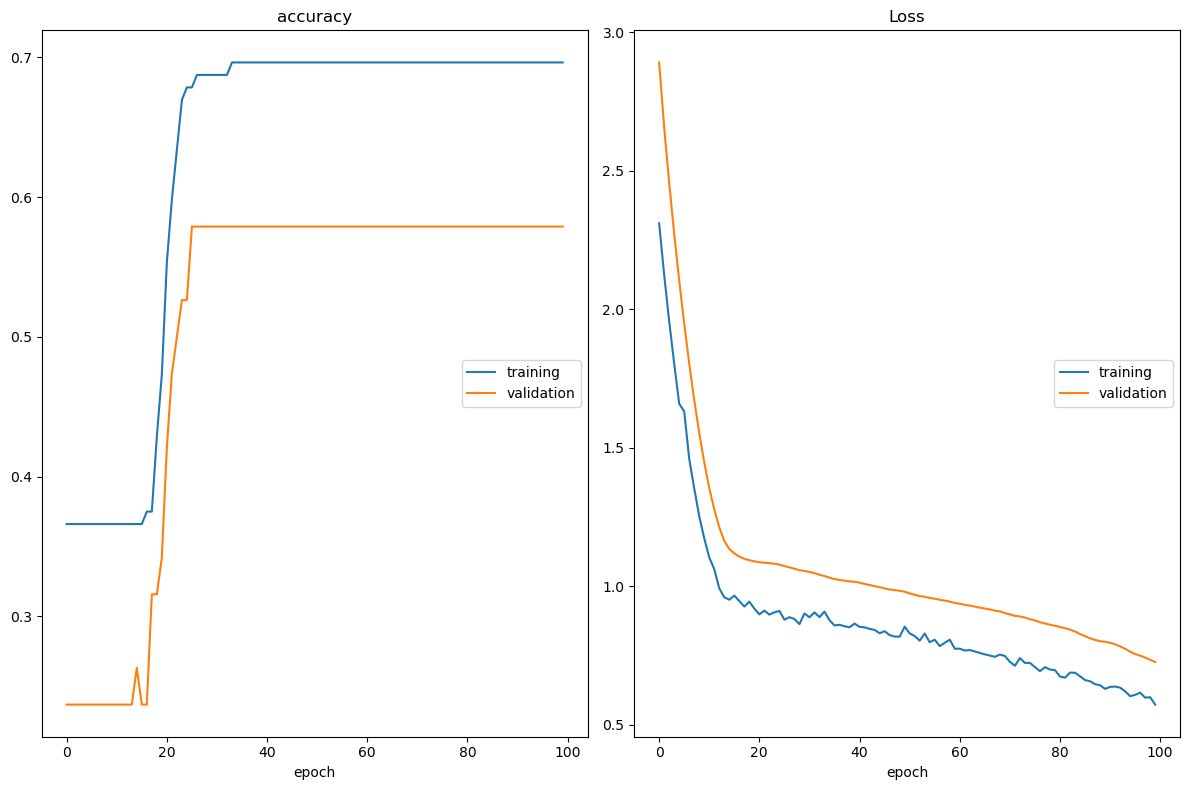

accuracy
	training         	 (min:    0.366, max:    0.696, cur:    0.696)
	validation       	 (min:    0.237, max:    0.579, cur:    0.579)
Loss
	training         	 (min:    0.573, max:    2.311, cur:    0.573)
	validation       	 (min:    0.727, max:    2.891, cur:    0.727)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step - accuracy: 0.6911 - loss: 0.5764 - val_accuracy: 0.5789 - val_loss: 0.7273


In [80]:
irisModel1.fit(xtrain,ytrain_encoded,epochs=100,validation_data=(xtest,ytest_encoded),callbacks=[PlotLossesKerasTF()])

# Demonstration of Dropout

In [90]:
# Demonstration of Dropout

from tensorflow.keras.layers import Dense, Dropout, Input
irisModel2=Sequential()
irisModel2.add(Input(shape=(4,)))
irisModel2.add(Dense(8,activation='relu'))
irisModel2.add(Dropout(0.30))
irisModel2.add(Dense(6,activation='relu'))
irisModel2.add(Dropout(0.30))
irisModel2.add(Dense(4,activation='relu'))
irisModel2.add(Dropout(0.30))
irisModel2.add(Dense(3,activation='softmax'))
irisModel2.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

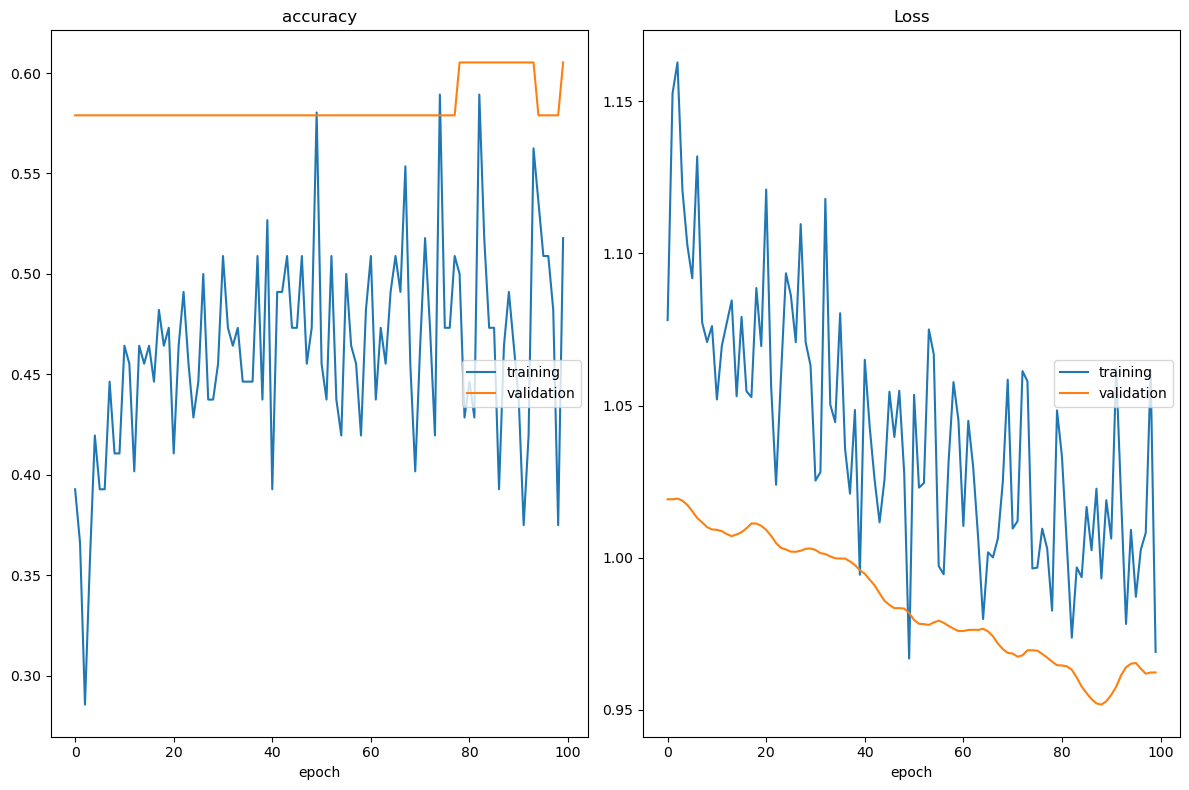

accuracy
	training         	 (min:    0.286, max:    0.589, cur:    0.518)
	validation       	 (min:    0.579, max:    0.605, cur:    0.605)
Loss
	training         	 (min:    0.967, max:    1.163, cur:    0.969)
	validation       	 (min:    0.952, max:    1.019, cur:    0.962)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 279ms/step - accuracy: 0.5061 - loss: 1.0000 - val_accuracy: 0.6053 - val_loss: 0.9623


In [94]:
irisModel2.fit(xtrain,ytrain_encoded,epochs=100,validation_data=(xtest,ytest_encoded),callbacks=[PlotLossesKerasTF()])

# Demonstration of Dropout with Regularization

In [86]:
from tensorflow.keras.layers import Dense, Dropout, Input
irisModel3=Sequential()
irisModel3.add(Input(shape=(4,)))
irisModel3.add(Dense(8,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel3.add(Dropout(0.30))
irisModel3.add(Dense(6,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel3.add(Dropout(0.30))
irisModel3.add(Dense(4,activation='relu',kernel_regularizer=l1(l1=0.001)))
irisModel3.add(Dropout(0.30))
irisModel3.add(Dense(3,activation='softmax'))
irisModel3.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

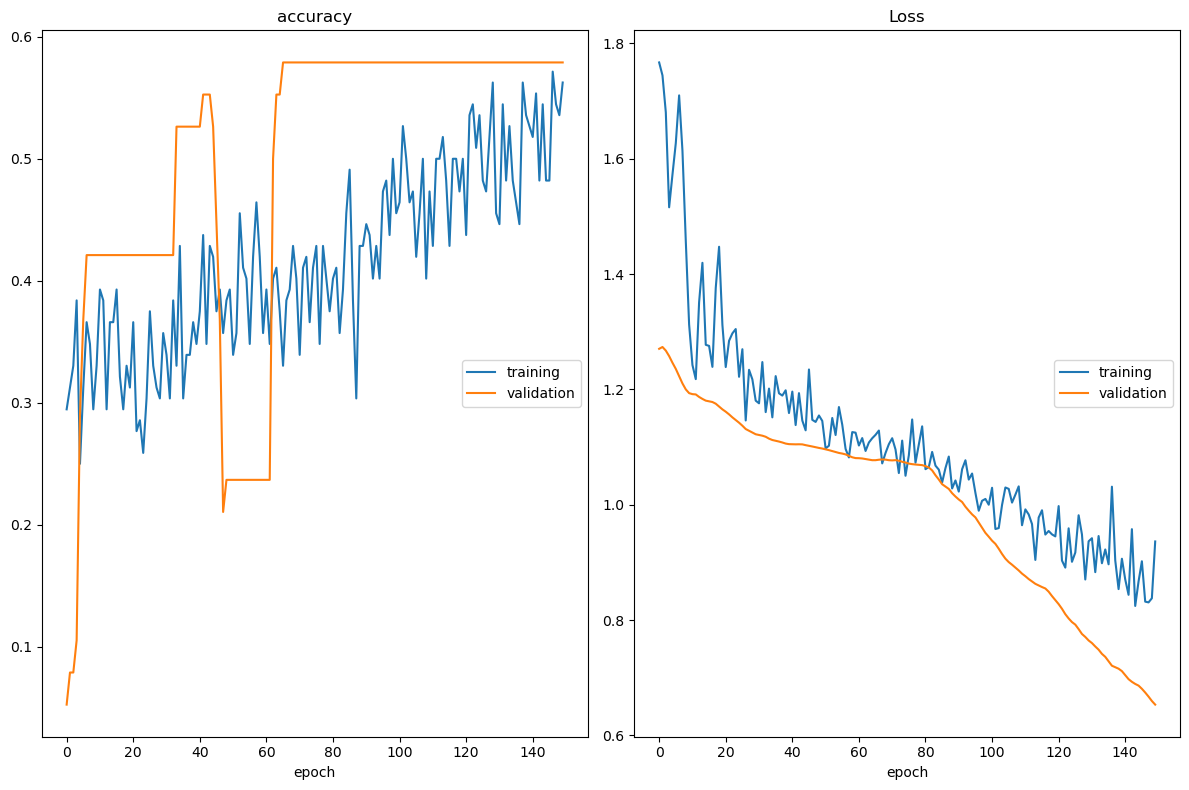

accuracy
	training         	 (min:    0.250, max:    0.571, cur:    0.562)
	validation       	 (min:    0.053, max:    0.579, cur:    0.579)
Loss
	training         	 (min:    0.824, max:    1.767, cur:    0.936)
	validation       	 (min:    0.653, max:    1.273, cur:    0.653)
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.5844 - loss: 0.8839 - val_accuracy: 0.5789 - val_loss: 0.6533


In [88]:
irisModel3.fit(xtrain,ytrain_encoded,epochs=150,validation_data=(xtest,ytest_encoded),callbacks=[PlotLossesKerasTF()])